# Rain Tomorrow ?

We are utilizing [Australian Weather dataset](https://www.kaggle.com/datasets/arunavakrchakraborty/australia-weather-data) from Kaggle.com , which contains about 10 years of daily weather observations from many locations across Australia

We plan to use clustering techniques (R3) such as K-means, Random Forest, Decision Trees and classification (R4) models like Naïve Bayes and k-Nearest Neighbours to predict whether it will rain or not.




# Load the imports


In [1]:
!pip install imbalanced-learn
!pip install scikit-learn imbalanced-learn xgboost
!pip install lightgbm
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 19.5 MB/s eta 0:00:00


In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Google Colab-specific imports
from google.colab import drive

# Common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn modules
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelBinarizer, StandardScaler, MinMaxScaler  # Add commonly used preprocessors
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score  # Include common functions
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif, RFE

# Imbalanced-learn module
from imblearn.over_sampling import SMOTE

# Advanced machine learning frameworks
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# TensorFlow/Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Load dataset into variables

# Displaying the dataset

In [85]:
# Load the training dataset
train_file_path = '/content/drive/MyDrive/DMML/Weather Training Data.csv'
train_data = pd.read_csv(train_file_path)

In [86]:
train_data.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


In [87]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         99516 non-null  object 
 1   Location       99516 non-null  object 
 2   MinTemp        99073 non-null  float64
 3   MaxTemp        99286 non-null  float64
 4   Rainfall       98537 non-null  float64
 5   Evaporation    56985 non-null  float64
 6   Sunshine       52199 non-null  float64
 7   WindGustDir    92995 non-null  object 
 8   WindGustSpeed  93036 non-null  float64
 9   WindDir9am     92510 non-null  object 
 10  WindDir3pm     96868 non-null  object 
 11  WindSpeed9am   98581 non-null  float64
 12  WindSpeed3pm   97681 non-null  float64
 13  Humidity9am    98283 non-null  float64
 14  Humidity3pm    97010 non-null  float64
 15  Pressure9am    89768 non-null  float64
 16  Pressure3pm    89780 non-null  float64
 17  Cloud9am       61944 non-null  float64
 18  Cloud3

Missing Values in Dataset:
               Missing Values  Percentage
Sunshine                47317   47.547128
Evaporation             42531   42.737851
Cloud3pm                40002   40.196551
Cloud9am                37572   37.754733
Pressure9am              9748    9.795410
Pressure3pm              9736    9.783351
WindDir9am               7006    7.040074
WindGustDir              6521    6.552715
WindGustSpeed            6480    6.511516
WindDir3pm               2648    2.660879
Humidity3pm              2506    2.518188
Temp3pm                  1904    1.913260
WindSpeed3pm             1835    1.843925
Humidity9am              1233    1.238997
Rainfall                  979    0.983761
RainToday                 979    0.983761
WindSpeed9am              935    0.939547
Temp9am                   614    0.616986
MinTemp                   443    0.445155
MaxTemp                   230    0.231119


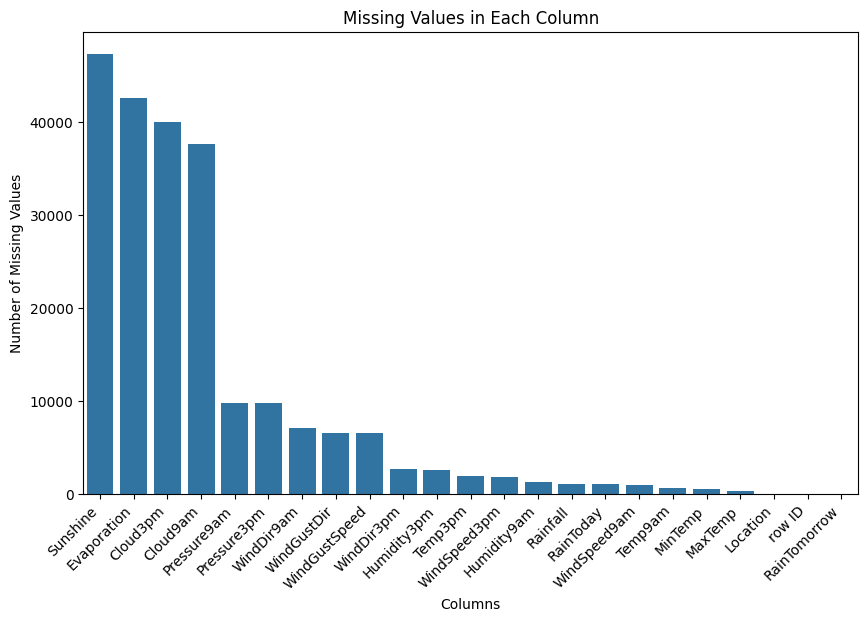

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
train_data.describe()
train_data.shape
# Assuming your data is loaded into a DataFrame called `df`
# Check for missing values
missing_values = train_data.isnull().sum()
missing_percentage = (missing_values / len(train_data)) * 100

# Combine results into a DataFrame for easier visualization
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

# Print missing values
print("Missing Values in Dataset:")
print(missing_data[missing_data['Missing Values'] > 0])

# Plot missing values as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.index, y=missing_data['Missing Values'])
plt.xticks(rotation=45, ha='right')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

# Preprocessing and Balancing the dataset

In [7]:
# Essential libraries
import pandas as pd
import numpy as np
from collections import Counter

# Preprocessing libraries
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# SMOTE for handling class imbalance
from imblearn.over_sampling import SMOTE
# Load the training dataset
train_file_path = '/content/drive/MyDrive/DMML/Weather Training Data.csv'
train_data_cleaned = pd.read_csv(train_file_path)

# Step 1: Encode "RainToday" column as binary
if "RainToday" in train_data_cleaned.columns:
    train_data_cleaned["RainToday"] = train_data_cleaned["RainToday"].map({"Yes": 1, "No": 0})

# Step 2: Separate features and target for training data
target_column = 'RainTomorrow'
X = train_data_cleaned.drop(columns=[target_column])
y = train_data_cleaned[target_column]

# Step 3: Separate categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['number']).columns

# Encode categorical columns
encoder = LabelEncoder()
for col in categorical_columns:
    X[col] = encoder.fit_transform(X[col].astype(str))

# Handle missing values for numerical columns
imputer = SimpleImputer(strategy='mean')
X[numerical_columns] = imputer.fit_transform(X[numerical_columns])

# Step 4: Apply SMOTE for class imbalance
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

print("Class distribution after SMOTE:", Counter(y_balanced))

# Step 5: Normalize numerical columns using MinMaxScaler
scaler = MinMaxScaler()
X_balanced = pd.DataFrame(X_balanced, columns=X.columns)
X_balanced[numerical_columns] = scaler.fit_transform(X_balanced[numerical_columns])

# Save cleaned and preprocessed dataset
balanced_train_file_path = '/content/drive/MyDrive/DMML/Balanced_Normalized_Weather_Training_Data.csv'

# Combine features and target before saving
train_balanced_cleaned = pd.concat([X_balanced, y_balanced], axis=1)
train_balanced_cleaned.to_csv(balanced_train_file_path, index=False)

print(f"Balanced and MinMax-scaled training dataset saved to: {balanced_train_file_path}")

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)
print(f"Training Set Shape: {X_train.shape}, {y_train.shape}")
print(f"Test Set Shape: {X_test.shape}, {y_test.shape}")


Class distribution after SMOTE: Counter({0: 77157, 1: 77157})
Balanced and MinMax-scaled training dataset saved to: /content/drive/MyDrive/DMML/Balanced_Normalized_Weather_Training_Data.csv
Training Set Shape: (108019, 22), (108019,)
Test Set Shape: (46295, 22), (46295,)


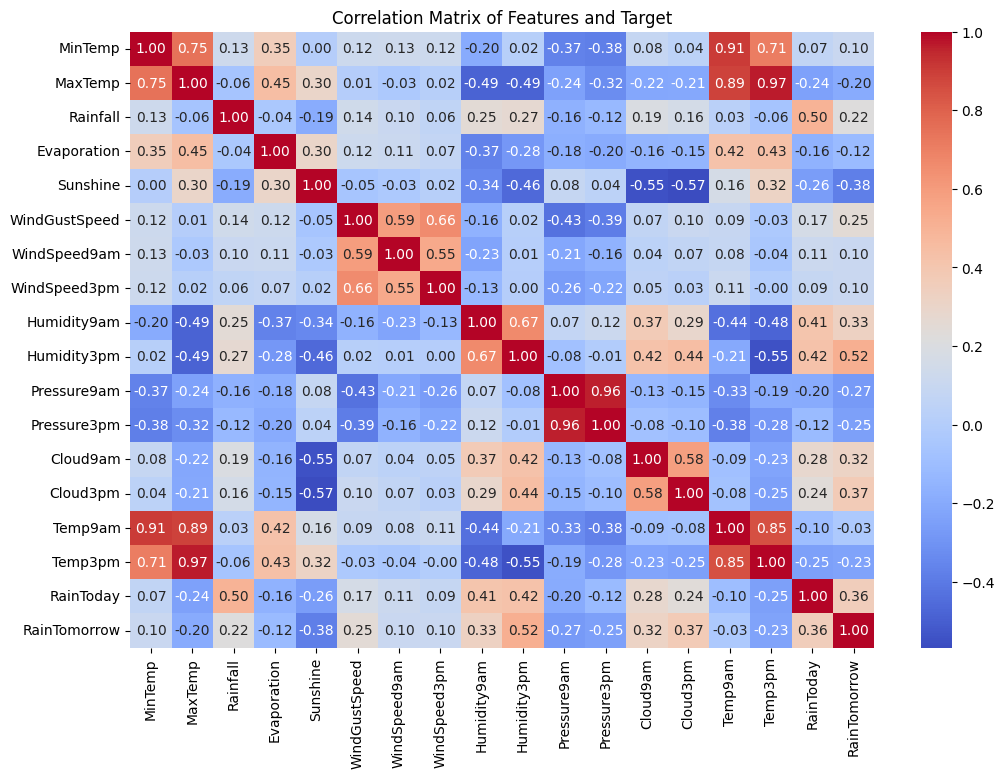

In [8]:
# Step 6: Correlation Matrix
# Calculate the correlation matrix for the numerical features and the target
correlation_matrix = pd.concat([X_balanced[numerical_columns], y_balanced], axis=1).corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Features and Target")
plt.show()

# Sort correlations with the target variable
target_corr = correlation_matrix[target_column].sort_values(ascending=False)
print("\nFeatures sorted by correlation with the target variable (RainTomorrow):")
print(target_corr)


# Feature Selection Analysis

Correlation Matrix



Features sorted by correlation with the target variable (RainTomorrow):
RainTomorrow     1.000000
Humidity3pm      0.516655
Cloud3pm         0.372723
RainToday        0.356279
Humidity9am      0.328966
Cloud9am         0.317860
WindGustSpeed    0.249437
Rainfall         0.221658
WindSpeed3pm     0.103595
MinTemp          0.102178
WindSpeed9am     0.101713
Temp9am         -0.032835
Evaporation     -0.120373
MaxTemp         -0.199114
Temp3pm         -0.234255
Pressure3pm     -0.248414
Pressure9am     -0.273530
Sunshine        -0.378943
Name: RainTomorrow, dtype: float64


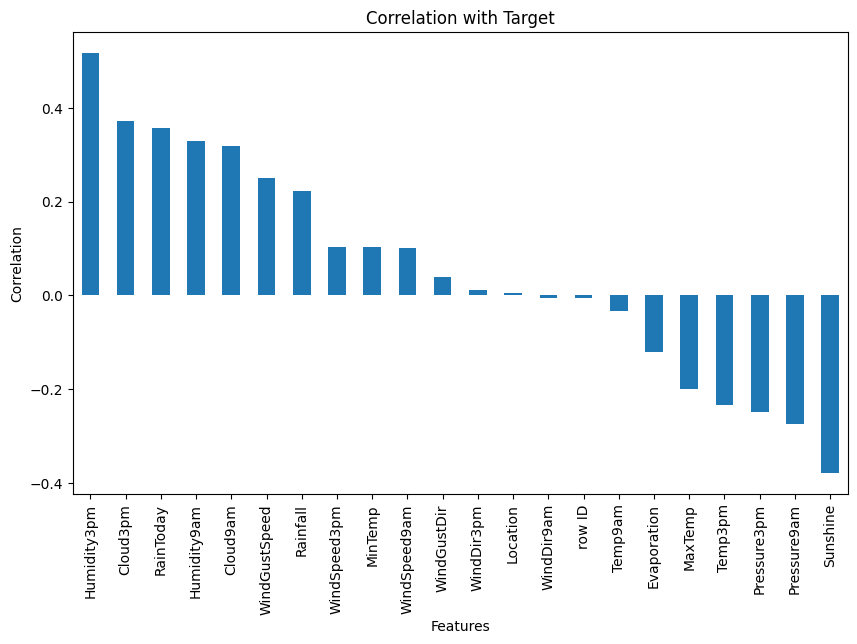

In [9]:
# Correlation Matrix
# Use the feature names from the original dataset
correlation_matrix = pd.DataFrame(X_balanced, columns=X_train.columns).corrwith(y_balanced)

# Plotting the correlation with the target variable
plt.figure(figsize=(10, 6))
correlation_matrix.sort_values(ascending=False).plot(kind="bar")
plt.title("Correlation with Target")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.show()


Mutual Information

Mutual Information Scores:
 Humidity3pm      0.400623
Humidity9am      0.348537
MaxTemp          0.342194
Temp3pm          0.342128
MinTemp          0.338095
Temp9am          0.335998
Pressure9am      0.323084
Pressure3pm      0.320960
WindGustSpeed    0.315978
WindSpeed3pm     0.304127
WindSpeed9am     0.299626
Rainfall         0.268851
Sunshine         0.227662
Cloud3pm         0.209409
Cloud9am         0.204133
Evaporation      0.202676
RainToday        0.161199
row ID           0.147987
Location         0.024113
WindDir9am       0.019593
WindGustDir      0.015532
WindDir3pm       0.012401
dtype: float64


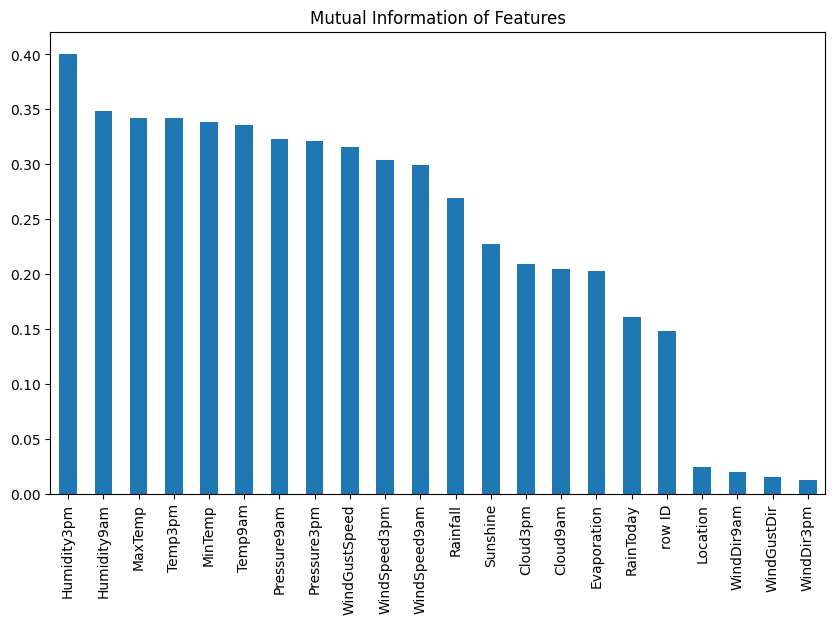

In [10]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt

### Mutual Information
mi = mutual_info_classif(X_balanced, y_balanced)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print("Mutual Information Scores:\n", mi_series)

plt.figure(figsize=(10, 6))
mi_series.plot(kind="bar")
plt.title("Mutual Information of Features")
plt.show()

Wrapper Method


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

## (b) Wrapper Methods: Recursive Feature Elimination (RFE)
model = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(estimator=model, n_features_to_select=5)  # Adjust number of features as needed
X_rfe = rfe.fit_transform(X_balanced, y_balanced)
selected_rfe_features = X.columns[rfe.support_]
print("Selected Features by RFE:\n", selected_rfe_features)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Selected Features by RFE:
 Index(['Rainfall', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm'],
      dtype='object')


Random Forest Classifier

Feature Importances (Random Forest):
 Humidity3pm      0.140714
Rainfall         0.123468
RainToday        0.106375
Cloud3pm         0.053553
WindGustSpeed    0.053213
Sunshine         0.052065
Humidity9am      0.046140
Pressure3pm      0.045830
Pressure9am      0.037758
row ID           0.035085
Cloud9am         0.032520
Temp3pm          0.030576
MinTemp          0.029542
WindSpeed3pm     0.028365
MaxTemp          0.028023
Temp9am          0.027742
WindSpeed9am     0.027057
WindDir9am       0.021935
WindDir3pm       0.021758
WindGustDir      0.020299
Location         0.019714
Evaporation      0.018268
dtype: float64


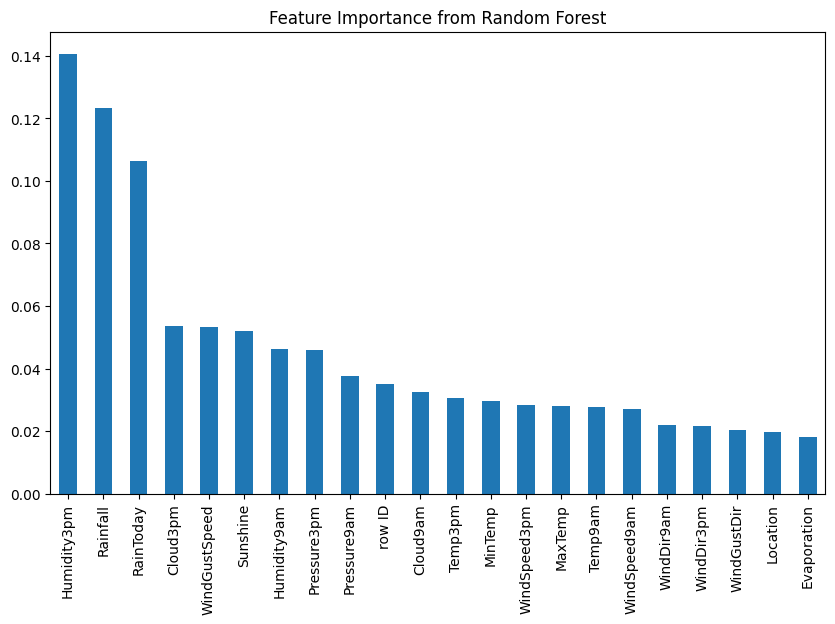

In [12]:
## (c) Embedded Methods: Tree-Based Feature Importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_balanced, y_balanced)

rf_feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances (Random Forest):\n", rf_feature_importances)

plt.figure(figsize=(10, 6))
rf_feature_importances.plot(kind="bar")
plt.title("Feature Importance from Random Forest")
plt.show()

Feature Importances (XGBoost):
 RainToday        0.296295
Rainfall         0.204322
Humidity3pm      0.081202
Cloud3pm         0.069864
Cloud9am         0.058372
WindGustSpeed    0.049518
Sunshine         0.036087
WindSpeed9am     0.034119
Pressure3pm      0.033059
WindSpeed3pm     0.032933
WindDir3pm       0.015650
WindDir9am       0.013855
Location         0.009392
Humidity9am      0.009321
row ID           0.009208
WindGustDir      0.007874
Temp3pm          0.007160
MinTemp          0.006870
MaxTemp          0.006867
Temp9am          0.006601
Pressure9am      0.006072
Evaporation      0.005358
dtype: float32


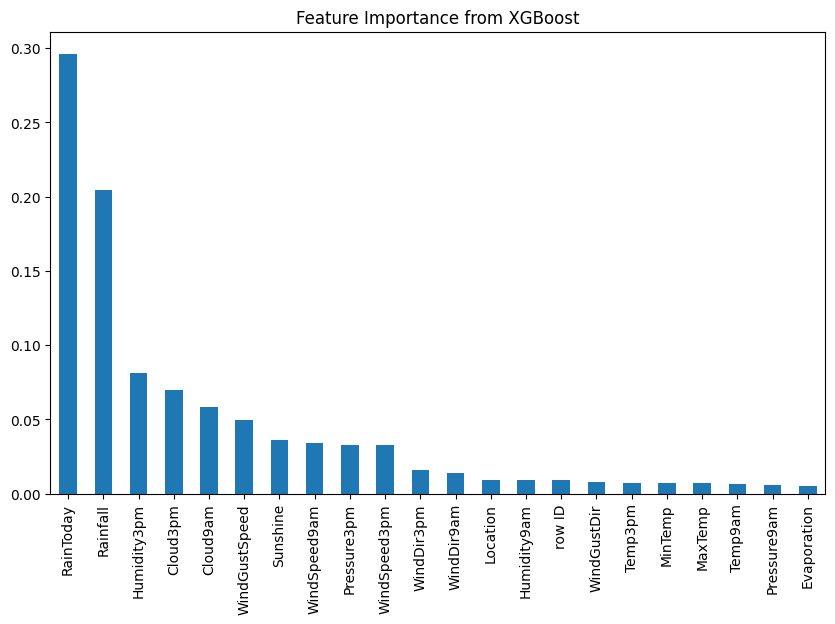

In [13]:
# Optional: Using XGBoost for Feature Importance
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_balanced, y_balanced)

xgb_feature_importances = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances (XGBoost):\n", xgb_feature_importances)

plt.figure(figsize=(10, 6))
xgb_feature_importances.plot(kind="bar")
plt.title("Feature Importance from XGBoost")
plt.show()


# Experimenting with different models

Split the DataSet

In [14]:
# Load cleaned training data
train_file_path = '/content/drive/MyDrive/DMML/Balanced_Normalized_Weather_Training_Data.csv'
train_data = pd.read_csv(train_file_path)

# Separate features and target
target_column = 'RainTomorrow'
X = train_data.drop(columns=[target_column])
y = train_data[target_column]

# Split data into training and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Detailed Investigation On Each Model

# Evaluation Method
Evaluates and prints performance metrics for a binary classification model.


In [15]:
def evaluate_metrics(y_true, y_pred, y_proba=None):
    # Compute metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_proba) if y_proba is not None else "N/A"

    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

    # Return metrics as a dictionary
    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    }


# Binary Classification

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Cross-Validation Metrics:
Mean CV Accuracy: 0.7707
CV Accuracy Standard Deviation: 0.0042


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Binary Classification Metrics After Cross-Validation:
Accuracy: 0.7542
Precision: 0.7755
Recall: 0.7218
F1-Score: 0.7477
ROC-AUC: 0.8384


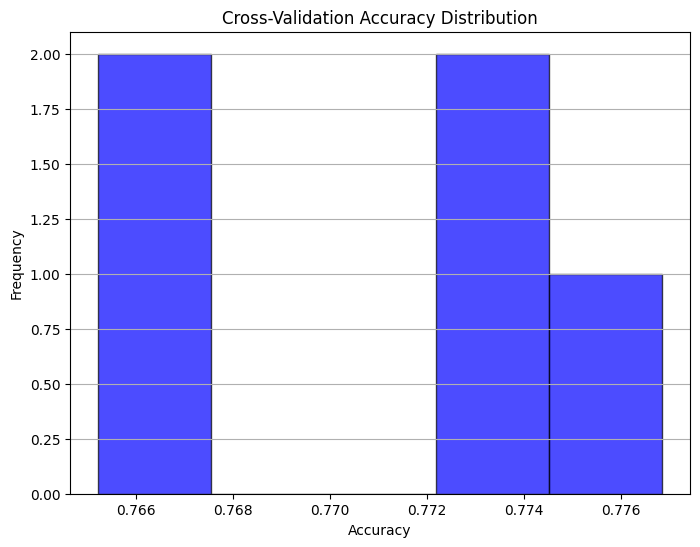

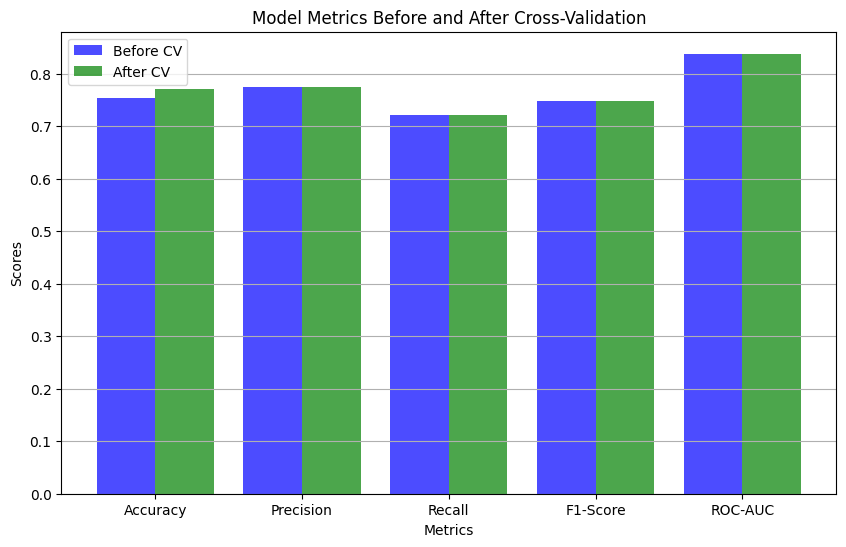

In [17]:
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Scikit-learn imports
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    PrecisionRecallDisplay
)
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Step 1: Perform Cross-Validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Display cross-validation results
print("\nCross-Validation Metrics:")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"CV Accuracy Standard Deviation: {cv_scores.std():.4f}")

# Step 2: Evaluate the Model Again After Cross-Validation
# Train model on full training set (optional; you may decide to use a fold-based approach)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)[:, 1]

# Metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_proba)

print("\nBinary Classification Metrics After Cross-Validation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Visualize Cross-Validation Accuracy Distribution
plt.figure(figsize=(8, 6))
plt.hist(cv_scores, bins=5, alpha=0.7, color='blue', edgecolor='black')
plt.title("Cross-Validation Accuracy Distribution")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()

# Step 3: Compare Pre-Cross Validation Metrics with Cross-Validation Metrics
cv_mean_accuracy = cv_scores.mean()

metrics_before = [accuracy, precision, recall, f1, roc_auc]
metrics_after = [cv_mean_accuracy, precision, recall, f1, roc_auc]  # Precision, recall, etc., don't change with CV

metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

plt.figure(figsize=(10, 6))
x = np.arange(len(metric_names))
width = 0.4

plt.bar(x - width/2, metrics_before, width, label='Before CV', color='blue', alpha=0.7)
plt.bar(x + width/2, metrics_after, width, label='After CV', color='green', alpha=0.7)

plt.title("Model Metrics Before and After Cross-Validation")
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.xticks(x, metric_names)
plt.legend()
plt.grid(axis='y')
plt.show()



# Random Forest

In [19]:
#  Train Random Forest with Default Parameters
print("\nTraining Random Forest with Default Parameters...")
default_rf_model = RandomForestClassifier(random_state=42)
default_rf_model.fit(X_train, y_train)

# Predict and Evaluate
y_pred_default_rf = default_rf_model.predict(X_val)
y_proba_default_rf = default_rf_model.predict_proba(X_val)[:, 1]

print("\nDefault Random Forest Results (Before Cross-Validation):")
evaluate_metrics(y_val, y_pred_default_rf, y_proba_default_rf)


# Step 4: Perform Cross-Validation
print("\nPerforming Cross-Validation...")
cv_accuracy = cross_val_score(default_rf_model, X_train, y_train, cv=5, scoring='accuracy')
cv_precision = cross_val_score(default_rf_model, X_train, y_train, cv=5, scoring='precision')
cv_recall = cross_val_score(default_rf_model, X_train, y_train, cv=5, scoring='recall')
cv_f1 = cross_val_score(default_rf_model, X_train, y_train, cv=5, scoring='f1')
cv_roc_auc = cross_val_score(default_rf_model, X_train, y_train, cv=5, scoring='roc_auc')

print("\nCross-Validation Metrics:")
print(f"CV Mean Accuracy: {cv_accuracy.mean():.4f}")
print(f"CV Accuracy Standard Deviation: {cv_accuracy.std():.4f}")
print(f"CV Mean Precision: {cv_precision.mean():.4f}")
print(f"CV Mean Recall: {cv_recall.mean():.4f}")
print(f"CV Mean F1-Score: {cv_f1.mean():.4f}")
print(f"CV Mean ROC-AUC: {cv_roc_auc.mean():.4f}")



Training Random Forest with Default Parameters...

Default Random Forest Results (Before Cross-Validation):
Accuracy: 0.8940
Precision: 0.9028
Recall: 0.8851
F1-Score: 0.8939
ROC-AUC: 0.9621

Performing Cross-Validation...

Cross-Validation Metrics:
CV Mean Accuracy: 0.8898
CV Accuracy Standard Deviation: 0.0029
CV Mean Precision: 0.8965
CV Mean Recall: 0.8804
CV Mean F1-Score: 0.8884
CV Mean ROC-AUC: 0.9591


# Multi-Layer Perceptron


Training Perceptron Model...

Perceptron Results (Before Cross-Validation):
Accuracy: 0.8067
Precision: 0.7697
Recall: 0.8357
F1-Score: 0.8014

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       160
           1       0.77      0.84      0.80       140

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300


Performing Cross-Validation...

Cross-Validation Metrics:
CV Mean Accuracy: 0.7510
CV Accuracy Standard Deviation: 0.0361
CV Mean Precision: 0.7332
CV Mean Recall: 0.7851
CV Mean F1-Score: 0.7581


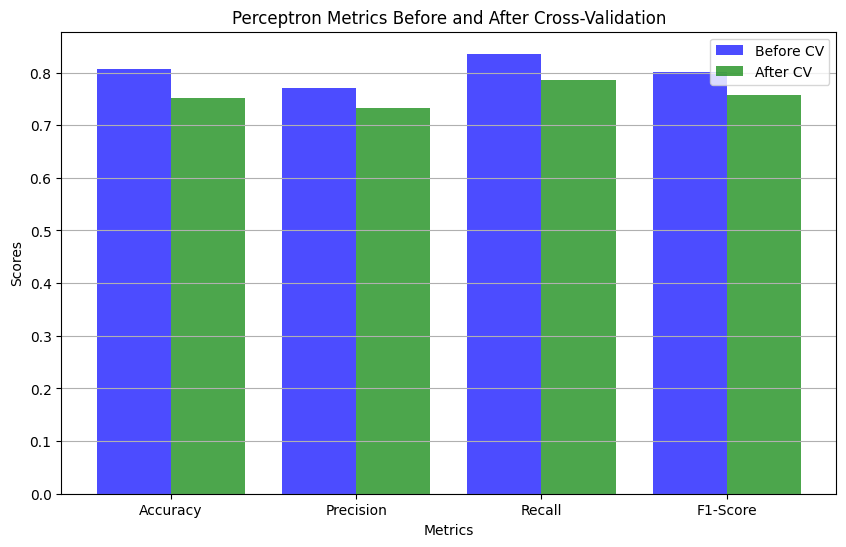

In [29]:
# Essential libraries
import numpy as np
import matplotlib.pyplot as plt

# Scikit-learn imports
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)
# Define and Train the Perceptron
print("\nTraining Perceptron Model...")
perceptron_model = Perceptron(max_iter=1000, random_state=42, tol=1e-3)
perceptron_model.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = perceptron_model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)


# Print metrics
print("\nPerceptron Results (Before Cross-Validation):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


# Optional: Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Step 6: Cross-Validation
print("\nPerforming Cross-Validation...")
cv_accuracy = cross_val_score(perceptron_model, X, y, cv=5, scoring='accuracy')
cv_precision = cross_val_score(perceptron_model, X, y, cv=5, scoring='precision')
cv_recall = cross_val_score(perceptron_model, X, y, cv=5, scoring='recall')
cv_f1 = cross_val_score(perceptron_model, X, y, cv=5, scoring='f1')

print("\nCross-Validation Metrics:")
print(f"CV Mean Accuracy: {cv_accuracy.mean():.4f}")
print(f"CV Accuracy Standard Deviation: {cv_accuracy.std():.4f}")
print(f"CV Mean Precision: {cv_precision.mean():.4f}")
print(f"CV Mean Recall: {cv_recall.mean():.4f}")
print(f"CV Mean F1-Score: {cv_f1.mean():.4f}")

# Step 7: Compare Before and After Cross-Validation
metrics_before = [accuracy, precision, recall, f1]
metrics_after = [cv_accuracy.mean(), cv_precision.mean(), cv_recall.mean(), cv_f1.mean()]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Visualization
plt.figure(figsize=(10, 6))
x = np.arange(len(metric_names))
width = 0.4

plt.bar(x - width/2, metrics_before, width, label='Before CV', color='blue', alpha=0.7)
plt.bar(x + width/2, metrics_after, width, label='After CV', color='green', alpha=0.7)

plt.title("Perceptron Metrics Before and After Cross-Validation")
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.xticks(x, metric_names)
plt.legend()
plt.grid(axis='y')
plt.show()



# Naïve Bayes


Training Naïve Bayes...

Naïve Bayes Results (Training Data):
Accuracy: 0.7871
Precision: 0.8157
Recall: 0.7542
F1-Score: 0.7837
ROC-AUC: 0.8828


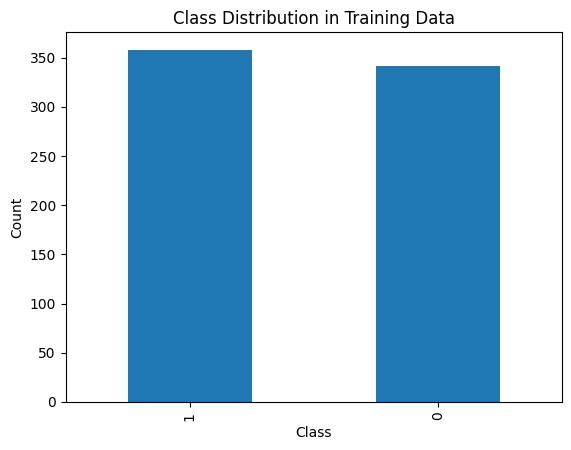


Naïve Bayes Results (Validation Data):
Accuracy: 0.8033
Precision: 0.7956
Recall: 0.7786
F1-Score: 0.7870
ROC-AUC: 0.8872

Performing Cross-Validation...

Naïve Bayes Cross-Validation Metrics:
Mean CV Accuracy: 0.7930
Mean CV Precision: 0.8181
Mean CV Recall: 0.7531
Mean CV F1-Score: 0.7836
Mean CV ROC-AUC: 0.8792


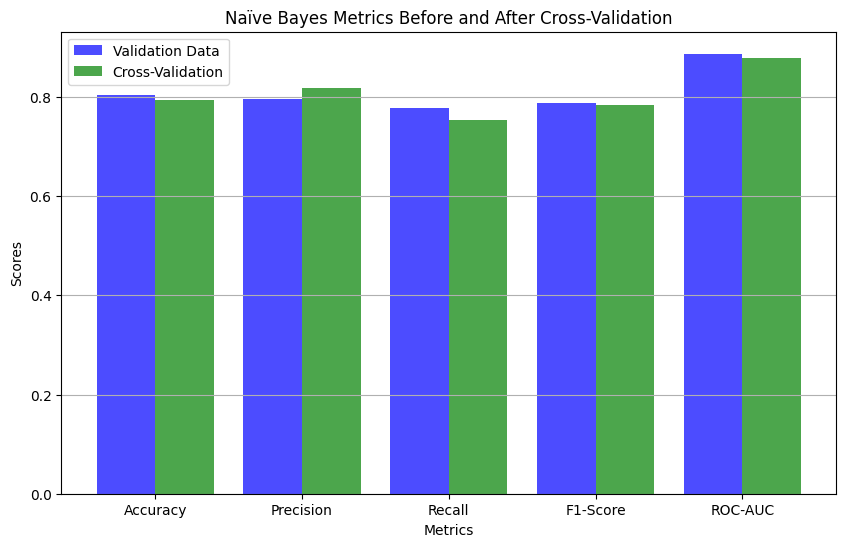

In [38]:
# Required Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

# Step 1: Handle Missing Values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)  # Converts DataFrame to NumPy array
X_val_imputed = imputer.transform(X_val)

# Step 2: Train Naïve Bayes Model
print("\nTraining Naïve Bayes...")
nb_model = GaussianNB()
nb_model.fit(X_train_imputed, y_train)

# Step 3: Evaluate on Training Data
y_pred_nb_train = nb_model.predict(X_train_imputed)
y_proba_nb_train = nb_model.predict_proba(X_train_imputed)[:, 1]

accuracy_train = accuracy_score(y_train, y_pred_nb_train)
precision_train = precision_score(y_train, y_pred_nb_train)
recall_train = recall_score(y_train, y_pred_nb_train)
f1_train = f1_score(y_train, y_pred_nb_train)
roc_auc_train = roc_auc_score(y_train, y_proba_nb_train)

print("\nNaïve Bayes Results (Training Data):")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1-Score: {f1_train:.4f}")
print(f"ROC-AUC: {roc_auc_train:.4f}")

# Step 4: Plot Class Distribution in Training Data
pd.Series(y_train).value_counts().plot(kind='bar')
plt.title("Class Distribution in Training Data")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Step 5: Evaluate on Validation Data
y_pred_nb_val = nb_model.predict(X_val_imputed)
y_proba_nb_val = nb_model.predict_proba(X_val_imputed)[:, 1]

accuracy_val = accuracy_score(y_val, y_pred_nb_val)
precision_val = precision_score(y_val, y_pred_nb_val)
recall_val = recall_score(y_val, y_pred_nb_val)
f1_val = f1_score(y_val, y_pred_nb_val)
roc_auc_val = roc_auc_score(y_val, y_proba_nb_val)

print("\nNaïve Bayes Results (Validation Data):")
print(f"Accuracy: {accuracy_val:.4f}")
print(f"Precision: {precision_val:.4f}")
print(f"Recall: {recall_val:.4f}")
print(f"F1-Score: {f1_val:.4f}")
print(f"ROC-AUC: {roc_auc_val:.4f}")

# Step 6: Cross-Validation
print("\nPerforming Cross-Validation...")
cv_accuracy = cross_val_score(nb_model, X, y, cv=5, scoring='accuracy')
cv_precision = cross_val_score(nb_model, X, y, cv=5, scoring='precision')
cv_recall = cross_val_score(nb_model, X, y, cv=5, scoring='recall')
cv_f1 = cross_val_score(nb_model, X, y, cv=5, scoring='f1')
cv_roc_auc = cross_val_score(nb_model, X, y, cv=5, scoring='roc_auc')

print("\nNaïve Bayes Cross-Validation Metrics:")
print(f"Mean CV Accuracy: {cv_accuracy.mean():.4f}")
print(f"Mean CV Precision: {cv_precision.mean():.4f}")
print(f"Mean CV Recall: {cv_recall.mean():.4f}")
print(f"Mean CV F1-Score: {cv_f1.mean():.4f}")
print(f"Mean CV ROC-AUC: {cv_roc_auc.mean():.4f}")

# Step 7: Compare Metrics Before and After Cross-Validation
metrics_before = [accuracy_val, precision_val, recall_val, f1_val, roc_auc_val]
metrics_after = [
    cv_accuracy.mean(),
    cv_precision.mean(),
    cv_recall.mean(),
    cv_f1.mean(),
    cv_roc_auc.mean()
]

metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

# Visualization
plt.figure(figsize=(10, 6))
x = np.arange(len(metric_names))
width = 0.4

plt.bar(x - width/2, metrics_before, width, label='Validation Data', color='blue', alpha=0.7)
plt.bar(x + width/2, metrics_after, width, label='Cross-Validation', color='green', alpha=0.7)

plt.title("Naïve Bayes Metrics Before and After Cross-Validation")
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.xticks(x, metric_names)
plt.legend()
plt.grid(axis='y')
plt.show()



# Naïve Bayes Variants


Training Bernoulli Naïve Bayes...

Bernoulli Naïve Bayes Results (Before Cross-Validation):
Accuracy: 0.7300
Precision: 0.6954
Recall: 0.7500
F1-Score: 0.7216
ROC-AUC: 0.8258

Performing Cross-Validation...

Cross-Validation Metrics:
CV Mean Accuracy: 0.7230
CV Accuracy Standard Deviation: 0.0117
CV Mean Precision: 0.7231
CV Mean Recall: 0.7249
CV Mean F1-Score: 0.7222
CV Mean ROC-AUC: 0.8104


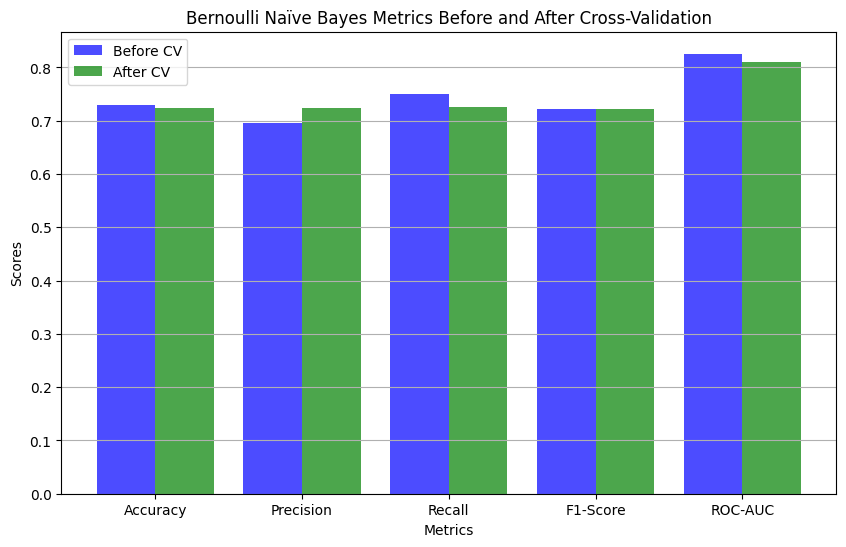

In [39]:
# Required Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report
)

# Step 1: Handle Missing Values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

# Step 2: Train Bernoulli Naïve Bayes
print("\nTraining Bernoulli Naïve Bayes...")
bnb_model = BernoulliNB()
bnb_model.fit(X_train_imputed, y_train)

# Step 3: Predict and Evaluate (Before Cross-Validation)
y_pred_bnb = bnb_model.predict(X_val_imputed)
y_proba_bnb = bnb_model.predict_proba(X_val_imputed)[:, 1]

# Evaluate Metrics (Before Cross-Validation)
accuracy_bnb = accuracy_score(y_val, y_pred_bnb)
precision_bnb = precision_score(y_val, y_pred_bnb)
recall_bnb = recall_score(y_val, y_pred_bnb)
f1_bnb = f1_score(y_val, y_pred_bnb)
roc_auc_bnb = roc_auc_score(y_val, y_proba_bnb)

print("\nBernoulli Naïve Bayes Results (Before Cross-Validation):")
print(f"Accuracy: {accuracy_bnb:.4f}")
print(f"Precision: {precision_bnb:.4f}")
print(f"Recall: {recall_bnb:.4f}")
print(f"F1-Score: {f1_bnb:.4f}")
print(f"ROC-AUC: {roc_auc_bnb:.4f}")

# Step 4: Cross-Validation
print("\nPerforming Cross-Validation...")
cv_accuracy = cross_val_score(bnb_model, X, y, cv=5, scoring='accuracy')
cv_precision = cross_val_score(bnb_model, X, y, cv=5, scoring='precision')
cv_recall = cross_val_score(bnb_model, X, y, cv=5, scoring='recall')
cv_f1 = cross_val_score(bnb_model, X, y, cv=5, scoring='f1')
cv_roc_auc = cross_val_score(bnb_model, X, y, cv=5, scoring='roc_auc')

# Print Cross-Validation Metrics
print("\nCross-Validation Metrics:")
print(f"CV Mean Accuracy: {cv_accuracy.mean():.4f}")
print(f"CV Accuracy Standard Deviation: {cv_accuracy.std():.4f}")
print(f"CV Mean Precision: {cv_precision.mean():.4f}")
print(f"CV Mean Recall: {cv_recall.mean():.4f}")
print(f"CV Mean F1-Score: {cv_f1.mean():.4f}")
print(f"CV Mean ROC-AUC: {cv_roc_auc.mean():.4f}")

# Step 5: Compare Metrics Before and After Cross-Validation
metrics_before = [accuracy_bnb, precision_bnb, recall_bnb, f1_bnb, roc_auc_bnb]
metrics_after = [
    cv_accuracy.mean(),
    cv_precision.mean(),
    cv_recall.mean(),
    cv_f1.mean(),
    cv_roc_auc.mean()
]

metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

# Visualization
plt.figure(figsize=(10, 6))
x = np.arange(len(metric_names))
width = 0.4

plt.bar(x - width/2, metrics_before, width, label='Before CV', color='blue', alpha=0.7)
plt.bar(x + width/2, metrics_after, width, label='After CV', color='green', alpha=0.7)

plt.title("Bernoulli Naïve Bayes Metrics Before and After Cross-Validation")
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.xticks(x, metric_names)
plt.legend()
plt.grid(axis='y')
plt.show()


# K-Nearest Neighbours


Training k-Nearest Neighbors...

k-Nearest Neighbors Results (Before Cross-Validation):
Accuracy: 0.9033
Precision: 0.8627
Recall: 0.9429
F1-Score: 0.9010
ROC-AUC: 0.9654

Performing Cross-Validation...

Cross-Validation Metrics:
CV Mean Accuracy: 0.9270
CV Accuracy Standard Deviation: 0.0133
CV Mean Precision: 0.9170
CV Mean Recall: 0.9397
CV Mean F1-Score: 0.9278
CV Mean ROC-AUC: 0.9736


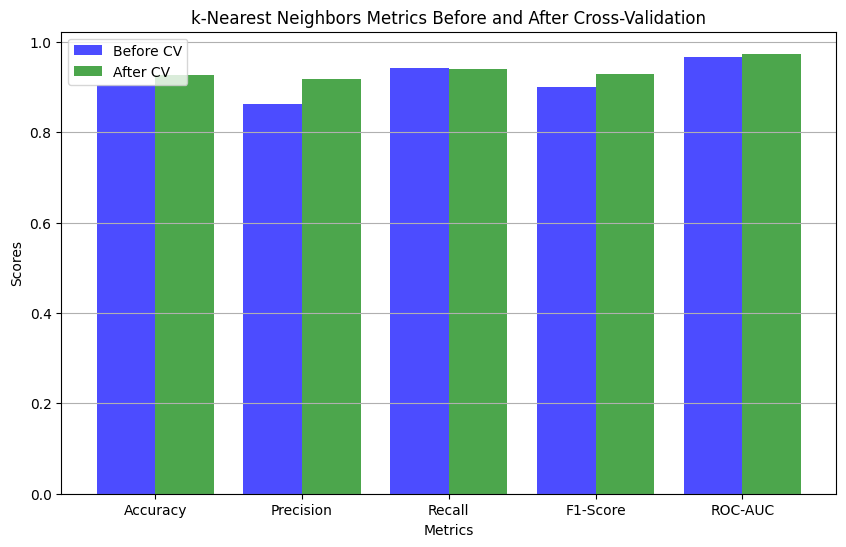

In [42]:
# Required Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)


# Step 1: Handle Missing Values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

# Step 3: Train k-Nearest Neighbors
print("\nTraining k-Nearest Neighbors...")
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default k = 5
knn_model.fit(X_train_imputed, y_train)

# Predict and Evaluate (Before Cross-Validation)
y_pred_knn = knn_model.predict(X_val_imputed)
y_proba_knn = knn_model.predict_proba(X_val_imputed)[:, 1]

# Evaluate Metrics
accuracy_knn = accuracy_score(y_val, y_pred_knn)
precision_knn = precision_score(y_val, y_pred_knn)
recall_knn = recall_score(y_val, y_pred_knn)
f1_knn = f1_score(y_val, y_pred_knn)
roc_auc_knn = roc_auc_score(y_val, y_proba_knn)

# Print Results
print("\nk-Nearest Neighbors Results (Before Cross-Validation):")
evaluate_metrics(y_val, y_pred_knn, y_proba_knn)


# Step 5: Perform Cross-Validation
print("\nPerforming Cross-Validation...")
cv_accuracy = cross_val_score(knn_model, X, y, cv=5, scoring='accuracy')
cv_precision = cross_val_score(knn_model, X, y, cv=5, scoring='precision')
cv_recall = cross_val_score(knn_model, X, y, cv=5, scoring='recall')
cv_f1 = cross_val_score(knn_model, X, y, cv=5, scoring='f1')
cv_roc_auc = cross_val_score(knn_model, X, y, cv=5, scoring='roc_auc')

# Print Cross-Validation Metrics
print("\nCross-Validation Metrics:")
print(f"CV Mean Accuracy: {cv_accuracy.mean():.4f}")
print(f"CV Accuracy Standard Deviation: {cv_accuracy.std():.4f}")
print(f"CV Mean Precision: {cv_precision.mean():.4f}")
print(f"CV Mean Recall: {cv_recall.mean():.4f}")
print(f"CV Mean F1-Score: {cv_f1.mean():.4f}")
print(f"CV Mean ROC-AUC: {cv_roc_auc.mean():.4f}")

# Step 6: Compare Before and After Cross-Validation
metrics_before = [accuracy_knn, precision_knn, recall_knn, f1_knn, roc_auc_knn]
metrics_after = [
    cv_accuracy.mean(),
    cv_precision.mean(),
    cv_recall.mean(),
    cv_f1.mean(),
    cv_roc_auc.mean()
]

metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

# Visualization
plt.figure(figsize=(10, 6))
x = np.arange(len(metric_names))
width = 0.4

plt.bar(x - width/2, metrics_before, width, label='Before CV', color='blue', alpha=0.7)
plt.bar(x + width/2, metrics_after, width, label='After CV', color='green', alpha=0.7)

plt.title("k-Nearest Neighbors Metrics Before and After Cross-Validation")
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.xticks(x, metric_names)
plt.legend()
plt.grid(axis='y')
plt.show()



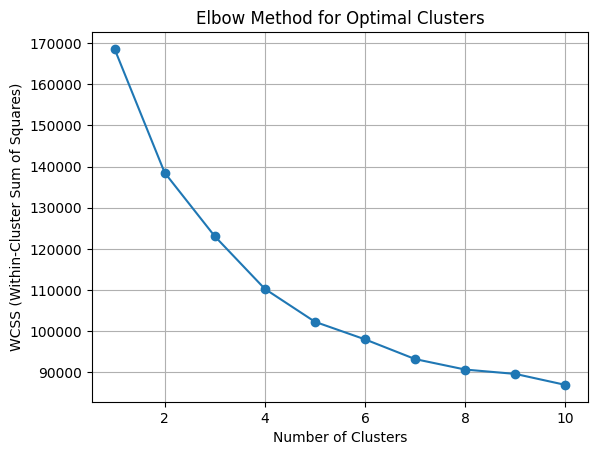

In [43]:
# Compute WCSS for different numbers of clusters
wcss = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train)  # Using your training data
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.grid()
plt.show()

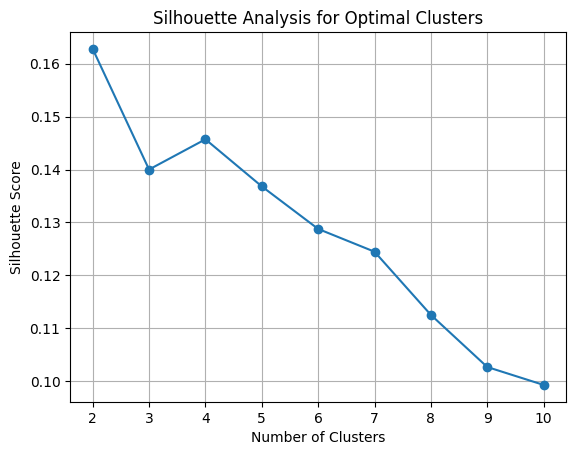

In [45]:
# Required Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming X_train is defined and preprocessed
# Calculate Silhouette Score for different numbers of clusters
silhouette_scores = []
for n_clusters in range(2, 11):  # Range of clusters to evaluate
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_train)  # Fit and predict cluster labels
    silhouette_scores.append(silhouette_score(X_train, labels))  # Calculate silhouette score

# Plot the Silhouette Analysis
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Analysis for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()


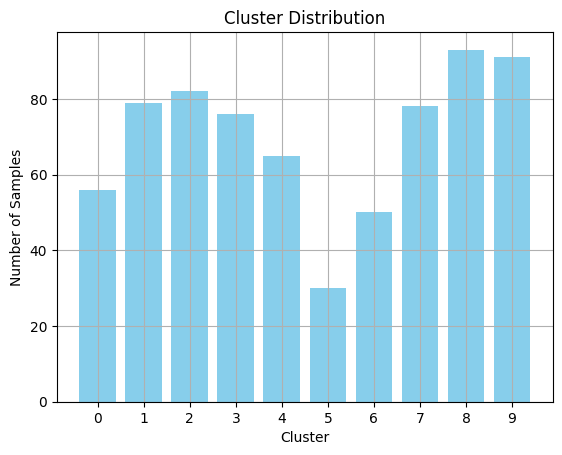

In [46]:
# Count samples in each cluster
cluster_counts = np.bincount(labels)

# Bar plot for cluster distribution
plt.bar(range(len(cluster_counts)), cluster_counts, color='skyblue')
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Samples")
plt.xticks(range(len(cluster_counts)))
plt.grid()
plt.show()


# Neural Network

In [47]:
# Prepare Labels for Neural Networks
lb = LabelBinarizer()
y_train_nn = lb.fit_transform(y_train)
y_val_nn = lb.transform(y_val)

# Build Neural Network
print("\nTraining Neural Network...")
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the Model
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
history1 = nn_model.fit(X_train, y_train_nn, epochs=20, batch_size=32, validation_data=(X_val, y_val_nn), verbose=1)

# Evaluate the Model
y_proba_nn = nn_model.predict(X_val).flatten()
y_pred_nn = (y_proba_nn > 0.5).astype(int)

# Print Results
print("\nNeural Network Results:")
evaluate_metrics(y_val, y_pred_nn, y_proba_nn)


Training Neural Network...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 138ms/step - accuracy: 0.6309 - loss: 0.6464 - val_accuracy: 0.8767 - val_loss: 0.3393
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8704 - loss: 0.3066 - val_accuracy: 0.9233 - val_loss: 0.2459
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9166 - loss: 0.2213 - val_accuracy: 0.9300 - val_loss: 0.2087
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9498 - loss: 0.1669 - val_accuracy: 0.9333 - val_loss: 0.1866
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9643 - loss: 0.1435 - val_accuracy: 0.9233 - val_loss: 0.2005
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9653 - loss: 0.1208 - val_accuracy: 0.9333 - val_loss: 0.1899
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9713 - loss: 0.1032 - val_accuracy: 0.9367 - val_loss: 0.1623
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9814 - loss: 0.0944 - val_accuracy: 0.9400 - val_los

{'Accuracy': 0.94,
 'Precision': 0.9013157894736842,
 'Recall': 0.9785714285714285,
 'F1-Score': 0.9383561643835616,
 'ROC-AUC': 0.9886160714285714}

Cross Validation

In [49]:
# Required Imports
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Assuming X and y are already defined as features and target
# Initialize Label Binarizer
lb = LabelBinarizer()

# Number of splits for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation metrics storage
cv_accuracies = []
cv_precisions = []
cv_recalls = []
cv_f1s = []
cv_roc_aucs = []

fold_no = 1

# Cross-Validation Loop
for train_idx, val_idx in kf.split(X):
    print(f"\nTraining Fold {fold_no}...")

    # Split data into training and validation sets
    X_train_fold, X_val_fold = X[train_idx], X[val_idx]
    y_train_fold, y_val_fold = y[train_idx], y[val_idx]

    # Prepare Labels
    y_train_nn_fold = lb.fit_transform(y_train_fold)
    y_val_nn_fold = lb.transform(y_val_fold)

    # Build Neural Network
    nn_model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_fold.shape[1],)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # Compile the Model
    nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the Model
    history = nn_model.fit(X_train_fold, y_train_nn_fold, epochs=20, batch_size=32,
                           validation_data=(X_val_fold, y_val_nn_fold), verbose=1)

    # Evaluate the Model
    y_proba_nn = nn_model.predict(X_val_fold).flatten()
    y_pred_nn = (y_proba_nn > 0.5).astype(int)

    # Calculate Metrics
    accuracy_nn = accuracy_score(y_val_fold, y_pred_nn)
    precision_nn = precision_score(y_val_fold, y_pred_nn)
    recall_nn = recall_score(y_val_fold, y_pred_nn)
    f1_nn = f1_score(y_val_fold, y_pred_nn)
    roc_auc_nn = roc_auc_score(y_val_fold, y_proba_nn)

    # Store metrics
    cv_accuracies.append(accuracy_nn)
    cv_precisions.append(precision_nn)
    cv_recalls.append(recall_nn)
    cv_f1s.append(f1_nn)
    cv_roc_aucs.append(roc_auc_nn)

    print(f"Fold {fold_no} Results - Accuracy: {accuracy_nn:.4f}, Precision: {precision_nn:.4f}, Recall: {recall_nn:.4f}, F1: {f1_nn:.4f}, ROC-AUC: {roc_auc_nn:.4f}")

    fold_no += 1

# Aggregate Cross-Validation Results
print("\nCross-Validation Results:")
print(f"Mean Accuracy: {np.mean(cv_accuracies):.4f} ± {np.std(cv_accuracies):.4f}")
print(f"Mean Precision: {np.mean(cv_precisions):.4f} ± {np.std(cv_precisions):.4f}")
print(f"Mean Recall: {np.mean(cv_recalls):.4f} ± {np.std(cv_recalls):.4f}")
print(f"Mean F1-Score: {np.mean(cv_f1s):.4f} ± {np.std(cv_f1s):.4f}")
print(f"Mean ROC-AUC: {np.mean(cv_roc_aucs):.4f} ± {np.std(cv_roc_aucs):.4f}")




Training Fold 1...
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.5727 - loss: 0.8045 - val_accuracy: 0.8550 - val_loss: 0.4030
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8745 - loss: 0.3432 - val_accuracy: 0.9000 - val_loss: 0.2964
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9306 - loss: 0.2323 - val_accuracy: 0.9150 - val_loss: 0.2506
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9403 - loss: 0.1978 - val_accuracy: 0.9100 - val_loss: 0.2392
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9498 - loss: 0.1567 - val_accuracy: 0.9100 - val_loss: 0.2017
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9700 - loss: 0.1270 - val_accuracy: 0.9200 - val_loss: 0.2089
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9697 - loss: 0.1254 - val_accuracy: 0.9150 - val_loss: 0.1990
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9832 - loss: 0.0989 - val_accuracy: 0.9250 - val_loss: 0.1904
Ep

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.6247 - loss: 0.6318 - val_accuracy: 0.8300 - val_loss: 0.3819
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8715 - loss: 0.3181 - val_accuracy: 0.8800 - val_loss: 0.2813
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9185 - loss: 0.2301 - val_accuracy: 0.9000 - val_loss: 0.2434
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9311 - loss: 0.1942 - val_accuracy: 0.9000 - val_loss: 0.2080
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9503 - loss: 0.1553 - val_accuracy: 0.9200 - val_loss: 0.1914
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9570 - loss: 0.1262 - val_accuracy: 0.9150 - val_loss: 0.1776
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9749 - loss: 0.1122 - val_accuracy: 0.9250 - val_loss: 0.1649
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9755 - loss: 0.1067 - val_accuracy: 0.9150 - val_loss: 0.1668
Ep

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Fold 2 Results - Accuracy: 0.9450, Precision: 0.9417, Recall: 0.9510, F1: 0.9463, ROC-AUC: 0.9937

Training Fold 3...
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.6515 - loss: 0.6465 - val_accuracy: 0.8550 - val_loss: 0.3847
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8901 - loss: 0.3168 - val_accuracy: 0.8550 - val_loss: 0.2997
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9281 - loss: 0.2132 - val_accuracy: 0.9100 - val_loss: 0.2669
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9523 - loss: 0.1718 - val_accuracy: 0.9350 - val_loss: 0.2492
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9665 - loss: 0.1250 - val_accuracy: 0.9200 - val_loss: 0.2377
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9697 - loss: 0.1142 - val_accuracy: 0.9250 - val_loss: 0.2310
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9858 - loss: 0.0762 - val_accuracy: 0.9250 - val_loss: 0.2448
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9774 - loss: 0.0765 - val_accuracy: 0.9250 - val_loss: 0.2320
Ep

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Fold 3 Results - Accuracy: 0.9550, Precision: 0.9492, Recall: 0.9739, F1: 0.9614, ROC-AUC: 0.9702

Training Fold 4...
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.5778 - loss: 0.7063 - val_accuracy: 0.8200 - val_loss: 0.4248
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8432 - loss: 0.3859 - val_accuracy: 0.8950 - val_loss: 0.2990
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8975 - loss: 0.2439 - val_accuracy: 0.9200 - val_loss: 0.2415
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9325 - loss: 0.2051 - val_accuracy: 0.9200 - val_loss: 0.2028
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9368 - loss: 0.1704 - val_accuracy: 0.9250 - val_loss: 0.1903
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9492 - loss: 0.1511 - val_accuracy: 0.9200 - val_loss: 0.1765
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9599 - loss: 0.1255 - val_accuracy: 0.9050 - val_loss: 0.1679
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9698 - loss: 0.1169 - val_accuracy: 0.9300 - val_loss: 0.1558
Ep

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.5990 - loss: 0.6890 - val_accuracy: 0.8800 - val_loss: 0.3475
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8975 - loss: 0.3133 - val_accuracy: 0.9200 - val_loss: 0.2562
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9227 - loss: 0.2289 - val_accuracy: 0.9350 - val_loss: 0.2134
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9419 - loss: 0.1986 - val_accuracy: 0.9350 - val_loss: 0.1964
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9671 - loss: 0.1411 - val_accuracy: 0.9350 - val_loss: 0.1956
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9488 - loss: 0.1440 - val_accuracy: 0.9550 - val_loss: 0.1603
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9649 - loss: 0.1173 - val_accuracy: 0.9550 - val_loss: 0.1577
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9664 - loss: 0.0972 - val_accuracy: 0.9500 - val_loss: 0.1494
Ep

# Neural Network v2

# Adjust Layer Sizes and Activation Functions

In [50]:
# Prepare Labels for Neural Networks
lb = LabelBinarizer()
y_train_nn = lb.fit_transform(y_train)
y_val_nn = lb.transform(y_val)

# Build Neural Network
print("\nTraining Neural Network with Adjusted Architecture...")
nn_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),  # Increased layer size
    Dense(128, activation='relu'),
    Dropout(0.3),  # Adding Dropout to reduce overfitting
    Dense(64, activation='tanh'),  # Experiment with tanh
    Dense(1, activation='sigmoid')
])

# Compile the Model
nn_model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])  # Decreased learning rate

# Train the Model
history2 = nn_model.fit(X_train, y_train_nn, epochs=30, batch_size=16, validation_data=(X_val, y_val_nn), verbose=1)  # Increased epochs, decreased batch size

# Evaluate the Model
y_proba_nn = nn_model.predict(X_val).flatten()
y_pred_nn = (y_proba_nn > 0.5).astype(int)

# Print Results
print("\nNeural Network Results (Adjusted Architecture):")
evaluate_metrics(y_val, y_pred_nn, y_proba_nn)




Training Neural Network with Adjusted Architecture...
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 0.6960 - loss: 0.5965 - val_accuracy: 0.8633 - val_loss: 0.3363
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8796 - loss: 0.3274 - val_accuracy: 0.8900 - val_loss: 0.2973
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8923 - loss: 0.2515 - val_accuracy: 0.9067 - val_loss: 0.2206
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9386 - loss: 0.1579 - val_accuracy: 0.9200 - val_loss: 0.1798
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9369 - loss: 0.1560 - val_accuracy: 0.9333 - val_loss: 0.1761
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9685 - loss: 0.1082 - val_accuracy: 0.9133 - val_loss: 0.2012
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9774 - loss: 0.0861 - val_accuracy: 0.9333 - val_loss: 0.1589
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9758 - loss: 0.0881 - val_accuracy: 0.9333 - val_loss: 0.1678
E

{'Accuracy': 0.9566666666666667,
 'Precision': 0.9319727891156463,
 'Recall': 0.9785714285714285,
 'F1-Score': 0.9547038327526133,
 'ROC-AUC': 0.9929910714285715}

# Add More Layers

In [51]:
print("\nTraining Deeper Neural Network...")
nn_model_deep = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.2),  # Adding Dropout after deeper layers
    Dense(1, activation='sigmoid')
])

# Compile and Train the Model
nn_model_deep.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history_deep = nn_model_deep.fit(X_train, y_train_nn, epochs=40, batch_size=32, validation_data=(X_val, y_val_nn), verbose=1)

# Evaluate the Model
y_proba_nn_deep = nn_model_deep.predict(X_val).flatten()
y_pred_nn_deep = (y_proba_nn_deep > 0.5).astype(int)

# Print Results
print("\nDeeper Neural Network Results:")
evaluate_metrics(y_val, y_pred_nn_deep, y_proba_nn_deep)



Training Deeper Neural Network...
Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 13s 385ms/step - accuracy: 0.6367 - loss: 0.6098 - val_accuracy: 0.8767 - val_loss: 0.3397
Epoch 2/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8812 - loss: 0.2873 - val_accuracy: 0.8867 - val_loss: 0.2866
Epoch 3/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9175 - loss: 0.2174 - val_accuracy: 0.9100 - val_loss: 0.2375
Epoch 4/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9420 - loss: 0.1559 - val_accuracy: 0.9367 - val_loss: 0.1691
Epoch 5/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9747 - loss: 0.0947 - val_accuracy: 0.9233 - val_loss: 0.1928
Epoch 6/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9827 - loss: 0.0693 - val_accuracy: 0.9233 - val_loss: 0.2024
Epoch 7/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9727 - loss: 0.0637 - val_accuracy: 0.9267 - val_loss: 0.1631
Epoch 8/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9886 - loss: 0.0518 - val_accuracy: 0.9267 - val_loss: 0.1787


{'Accuracy': 0.95,
 'Precision': 0.9139072847682119,
 'Recall': 0.9857142857142858,
 'F1-Score': 0.9484536082474226,
 'ROC-AUC': 0.9922767857142858}

# Add Dropout and Regularization

In [52]:
print("\nTraining Neural Network with Dropout and Regularization...")
nn_model_reg = Sequential([
    Dense(256, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid')
])

# Compile and Train the Model
nn_model_reg.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history_reg = nn_model_reg.fit(X_train, y_train_nn, epochs=30, batch_size=32, validation_data=(X_val, y_val_nn), verbose=1)

# Evaluate the Model
y_proba_nn_reg = nn_model_reg.predict(X_val).flatten()
y_pred_nn_reg = (y_proba_nn_reg > 0.5).astype(int)

# Print Results
print("\nNeural Network with Dropout and Regularization Results:")
evaluate_metrics(y_val, y_pred_nn_reg, y_proba_nn_reg)


Training Neural Network with Dropout and Regularization...
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 159ms/step - accuracy: 0.6121 - loss: 3.4862 - val_accuracy: 0.8433 - val_loss: 2.8913
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8127 - loss: 2.8134 - val_accuracy: 0.8933 - val_loss: 2.4016
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8782 - loss: 2.3553 - val_accuracy: 0.9000 - val_loss: 2.0290
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8898 - loss: 2.0114 - val_accuracy: 0.8800 - val_loss: 1.7797
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9046 - loss: 1.7463 - val_accuracy: 0.9167 - val_loss: 1.5277
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9177 - loss: 1.5025 - val_accuracy: 0.9200 - val_loss: 1.3385
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9346 - loss: 1.3011 - val_accuracy: 0.9133 - val_loss: 1.1855
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9509 - loss: 1.1281 - val_accuracy: 0.9300 - val_loss: 1.0762
E

{'Accuracy': 0.9566666666666667,
 'Precision': 0.9379310344827586,
 'Recall': 0.9714285714285714,
 'F1-Score': 0.9543859649122807,
 'ROC-AUC': 0.9861160714285715}

# Visualize Results

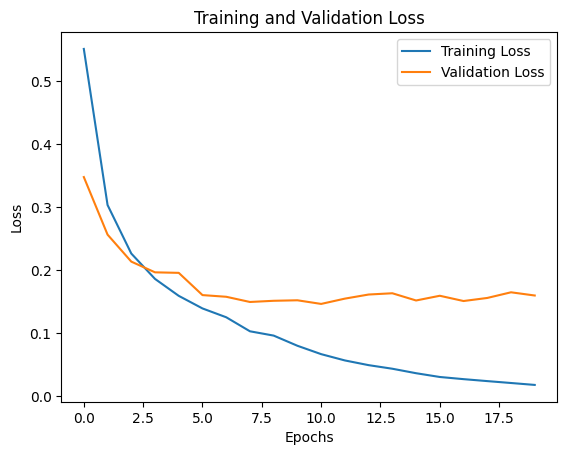

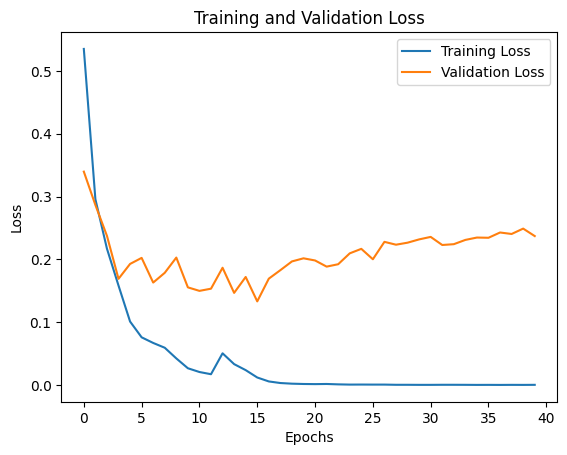

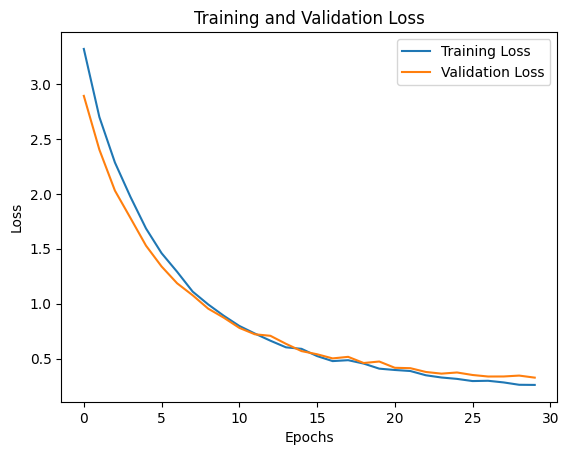

In [53]:
# Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot Training and Validation Loss
plt.plot(history_deep.history['loss'], label='Training Loss')
plt.plot(history_deep.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot Training and Validation Loss
plt.plot(history_reg.history['loss'], label='Training Loss')
plt.plot(history_reg.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Neural Networks (Multilayer Perceptron)

In [92]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train the MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_mlp = mlp_model.predict(X_val)

# Check if predict_proba is available for ROC-AUC calculation
if hasattr(mlp_model, "predict_proba"):
    y_proba_mlp = mlp_model.predict_proba(X_val)[:, 1]
else:
    y_proba_mlp = None

# Evaluate Metrics
accuracy = accuracy_score(y_val, y_pred_mlp)
precision = precision_score(y_val, y_pred_mlp)
recall = recall_score(y_val, y_pred_mlp)
f1 = f1_score(y_val, y_pred_mlp)
roc_auc = roc_auc_score(y_val, y_proba_mlp) if y_proba_mlp is not None else "N/A"

# Print Results
print("\nMLPClassifier Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc if roc_auc != 'N/A' else roc_auc}")





MLPClassifier Evaluation:
Accuracy: 0.9533
Precision: 0.9375
Recall: 0.9643
F1-Score: 0.9507
ROC-AUC: 0.9897321428571428


# Decision Tree

In [57]:
# Required Imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming X_train, X_val, y_train, and y_val are already defined

# Train Decision Tree
print("\nTraining Decision Tree...")
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)  # Limit depth to prevent overfitting
dt_model.fit(X_train, y_train)

# Predict and Evaluate
y_pred_dt = dt_model.predict(X_val)
y_proba_dt = dt_model.predict_proba(X_val)[:, 1]

# Custom Evaluation Function (Replace with your own function if already implemented)
def evaluate_metrics(y_true, y_pred, y_proba):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_proba)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

# Print Results
print("\nDecision Tree Results:")
evaluate_metrics(y_val, y_pred_dt, y_proba_dt)



Training Decision Tree...

Decision Tree Results:
Accuracy: 0.7800
Precision: 0.7434
Recall: 0.8071
F1-Score: 0.7740
ROC-AUC: 0.7842


# Decision Trees Variant


In [60]:
# Required Imports
from sklearn.ensemble import ExtraTreesClassifier, HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming X_train, X_val, y_train, and y_val are already defined

# Train Extra Trees Classifier
print("\nTraining Extra Trees Classifier...")
extra_trees_model = ExtraTreesClassifier(random_state=42)
extra_trees_model.fit(X_train, y_train)
y_pred_extra_trees = extra_trees_model.predict(X_val)
y_proba_extra_trees = extra_trees_model.predict_proba(X_val)[:, 1]

# Evaluate Extra Trees
accuracy_et = accuracy_score(y_val, y_pred_extra_trees)
precision_et = precision_score(y_val, y_pred_extra_trees)
recall_et = recall_score(y_val, y_pred_extra_trees)
f1_et = f1_score(y_val, y_pred_extra_trees)
roc_auc_et = roc_auc_score(y_val, y_proba_extra_trees)

print("\nExtra Trees Classifier Results:")
print(f"Accuracy: {accuracy_et:.4f}")
print(f"Precision: {precision_et:.4f}")
print(f"Recall: {recall_et:.4f}")
print(f"F1-Score: {f1_et:.4f}")
print(f"ROC-AUC: {roc_auc_et:.4f}")

# Train HistGradientBoostingClassifier
print("\nTraining HistGradientBoostingClassifier...")
hgb_model = HistGradientBoostingClassifier(random_state=42)
hgb_model.fit(X_train, y_train)
y_pred_hgb = hgb_model.predict(X_val)
y_proba_hgb = hgb_model.predict_proba(X_val)[:, 1]

# Evaluate HistGradientBoostingClassifier
accuracy_hgb = accuracy_score(y_val, y_pred_hgb)
precision_hgb = precision_score(y_val, y_pred_hgb)
recall_hgb = recall_score(y_val, y_pred_hgb)
f1_hgb = f1_score(y_val, y_pred_hgb)
roc_auc_hgb = roc_auc_score(y_val, y_proba_hgb)

print("\nHistGradientBoostingClassifier Results:")
print(f"Accuracy: {accuracy_hgb:.4f}")
print(f"Precision: {precision_hgb:.4f}")
print(f"Recall: {recall_hgb:.4f}")
print(f"F1-Score: {f1_hgb:.4f}")
print(f"ROC-AUC: {roc_auc_hgb:.4f}")



Training Extra Trees Classifier...

Extra Trees Classifier Results:
Accuracy: 0.9300
Precision: 0.9103
Recall: 0.9429
F1-Score: 0.9263
ROC-AUC: 0.9812

Training HistGradientBoostingClassifier...

HistGradientBoostingClassifier Results:
Accuracy: 0.9267
Precision: 0.8986
Recall: 0.9500
F1-Score: 0.9236
ROC-AUC: 0.9770


In [61]:
def evaluate_model(model, X_val, y_val, y_pred):
    print(f"\nEvaluating {model.__class__.__name__}...")

    # Metrics Calculation
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    # Check for predict_proba availability for ROC-AUC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_val)[:, 1]
        roc_auc = roc_auc_score(y_val, y_proba)
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_val)
        roc_auc = roc_auc_score(y_val, y_proba)
    else:
        roc_auc = "N/A"

    # Print Metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc}\n")

# Extra Trees Classifier
evaluate_model(extra_trees_model, X_val, y_val, y_pred_extra_trees)

# HistGradientBoostingClassifier
evaluate_model(hgb_model, X_val, y_val, y_pred_hgb)



Evaluating ExtraTreesClassifier...
Accuracy: 0.9300
Precision: 0.9103
Recall: 0.9429
F1-Score: 0.9263
ROC-AUC: 0.9811607142857144


Evaluating HistGradientBoostingClassifier...
Accuracy: 0.9267
Precision: 0.8986
Recall: 0.9500
F1-Score: 0.9236
ROC-AUC: 0.9769642857142857



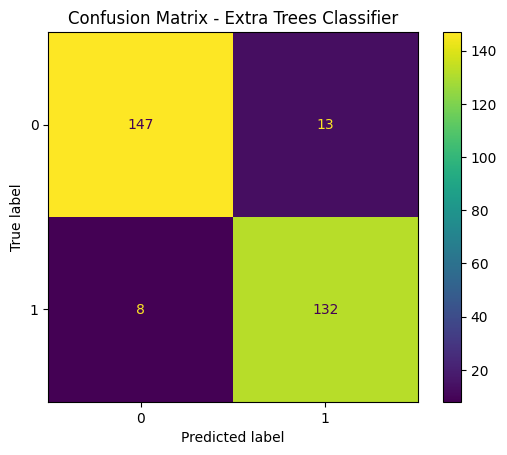

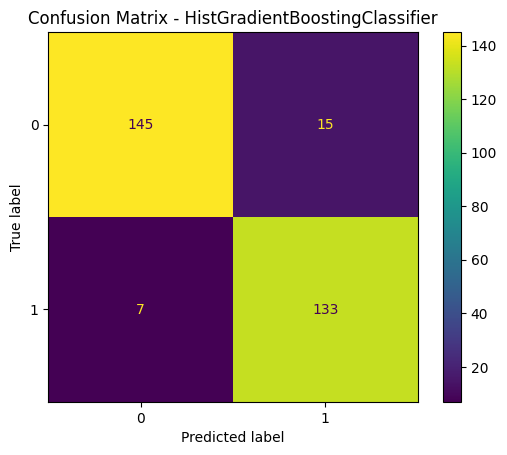

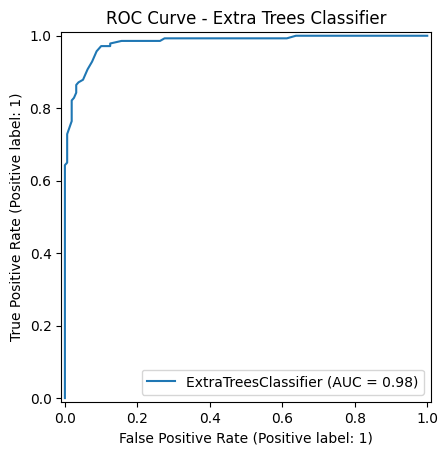

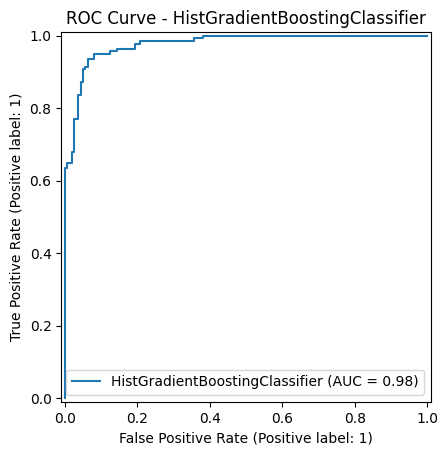

X_train must be a DataFrame with column names for feature importance visualization.


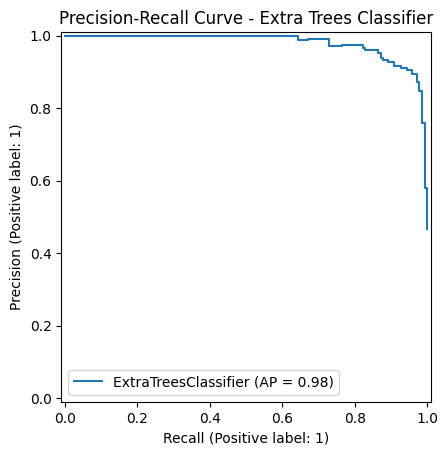

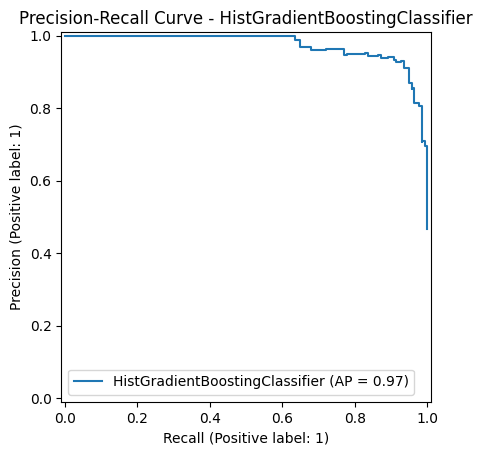

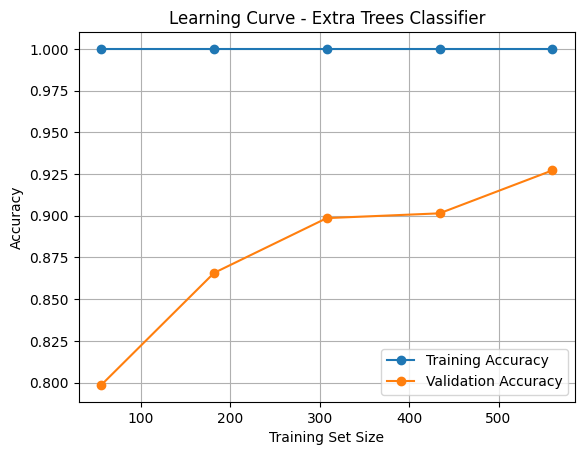

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.model_selection import learning_curve
# Confusion Matrix for Extra Trees Classifier
ConfusionMatrixDisplay.from_estimator(extra_trees_model, X_val, y_val)
plt.title("Confusion Matrix - Extra Trees Classifier")
plt.show()

# Confusion Matrix for HistGradientBoostingClassifier
ConfusionMatrixDisplay.from_estimator(hgb_model, X_val, y_val)
plt.title("Confusion Matrix - HistGradientBoostingClassifier")
plt.show()

# ROC Curve for Extra Trees Classifier
RocCurveDisplay.from_estimator(extra_trees_model, X_val, y_val)
plt.title("ROC Curve - Extra Trees Classifier")
plt.show()

# ROC Curve for HistGradientBoostingClassifier
RocCurveDisplay.from_estimator(hgb_model, X_val, y_val)
plt.title("ROC Curve - HistGradientBoostingClassifier")
plt.show()

# Feature Importance for Extra Trees
if isinstance(X_train, pd.DataFrame):  # Ensure X_train has column names
    feature_importances_extra_trees = pd.Series(extra_trees_model.feature_importances_, index=X_train.columns)
    feature_importances_extra_trees.sort_values().plot(kind='barh', figsize=(10, 6))
    plt.title("Feature Importances - Extra Trees Classifier")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()
else:
    print("X_train must be a DataFrame with column names for feature importance visualization.")

# Precision-Recall Curve for Extra Trees Classifier
PrecisionRecallDisplay.from_estimator(extra_trees_model, X_val, y_val)
plt.title("Precision-Recall Curve - Extra Trees Classifier")
plt.show()

# Precision-Recall Curve for HistGradientBoostingClassifier
PrecisionRecallDisplay.from_estimator(hgb_model, X_val, y_val)
plt.title("Precision-Recall Curve - HistGradientBoostingClassifier")
plt.show()

# Learning Curve for Extra Trees Classifier
train_sizes, train_scores, val_scores = learning_curve(
    extra_trees_model, X_train, y_train, cv=5, scoring='accuracy'
)

# Calculate mean scores
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

# Plot Learning Curve
plt.plot(train_sizes, train_scores_mean, label="Training Accuracy", marker='o')
plt.plot(train_sizes, val_scores_mean, label="Validation Accuracy", marker='o')
plt.title("Learning Curve - Extra Trees Classifier")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()



# K-Means for Label Propagation

In [65]:
kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans_model.fit_predict(X_train)


In [67]:
from sklearn.cluster import KMeans
from sklearn.metrics import (
    silhouette_score,
    adjusted_rand_score,
    homogeneity_score,
    completeness_score,
    v_measure_score
)
# K-Means Model
kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans_model.fit_predict(X_train)

# 1. Inertia
inertia = kmeans_model.inertia_
print(f"Inertia (Within-Cluster Sum of Squares): {inertia:.4f}")

# 2. Silhouette Score
silhouette_avg = silhouette_score(X_train, kmeans_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

# 3. Adjusted Rand Index (if y_train is available)
if 'y_train' in locals():
    ari = adjusted_rand_score(y_train, kmeans_labels)
    print(f"Adjusted Rand Index (ARI): {ari:.4f}")

# 4. Homogeneity, Completeness, V-Measure (if y_train is available)
if 'y_train' in locals():
    homogeneity = homogeneity_score(y_train, kmeans_labels)
    completeness = completeness_score(y_train, kmeans_labels)
    v_measure = v_measure_score(y_train, kmeans_labels)
    print(f"Homogeneity: {homogeneity:.4f}")
    print(f"Completeness: {completeness:.4f}")
    print(f"V-Measure: {v_measure:.4f}")


Inertia (Within-Cluster Sum of Squares): 138501.5002
Silhouette Score: 0.1628
Adjusted Rand Index (ARI): 0.0483
Homogeneity: 0.0358
Completeness: 0.0364
V-Measure: 0.0361


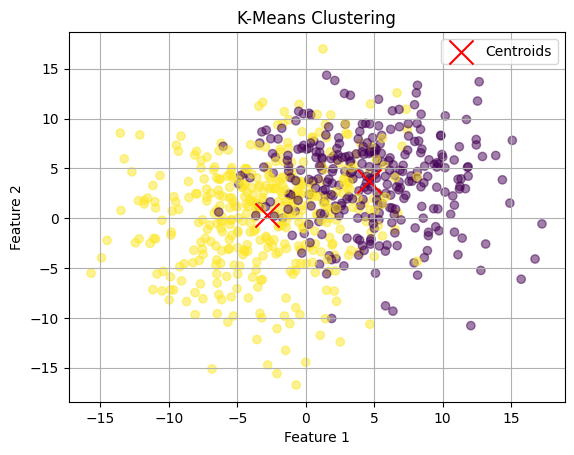

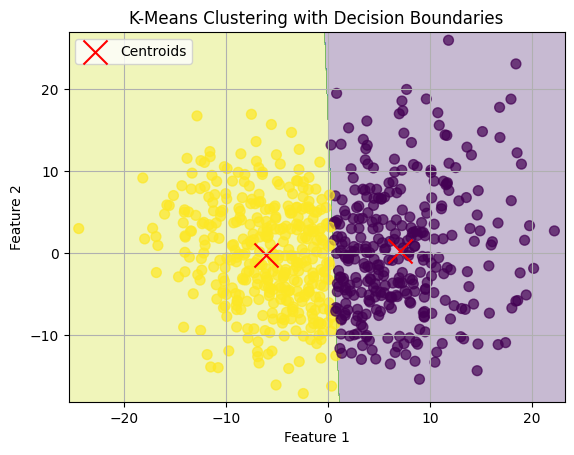

In [68]:
# Ensure X_train is converted to NumPy array for slicing
X_train_np = X_train.to_numpy() if hasattr(X_train, "to_numpy") else X_train

# Scatter plot for K-Means clustering
plt.scatter(X_train_np[:, 0], X_train_np[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()

# Reduce dimensions to 2 using PCA (if the data has more than 2 features)
if X_train.shape[1] > 2:
    pca = PCA(n_components=2)
    X_train_2d = pca.fit_transform(X_train)
else:
    X_train_2d = X_train  # Use the original data if it has exactly 2 features

# Fit K-Means on reduced data
kmeans_model_2d = KMeans(n_clusters=2, random_state=42)
kmeans_labels_2d = kmeans_model_2d.fit_predict(X_train_2d)

# Create a mesh grid
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict cluster labels for each point in the grid
Z = kmeans_model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=kmeans_labels_2d, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans_model_2d.cluster_centers_[:, 0], kmeans_model_2d.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroids')
plt.title("K-Means Clustering with Decision Boundaries")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()


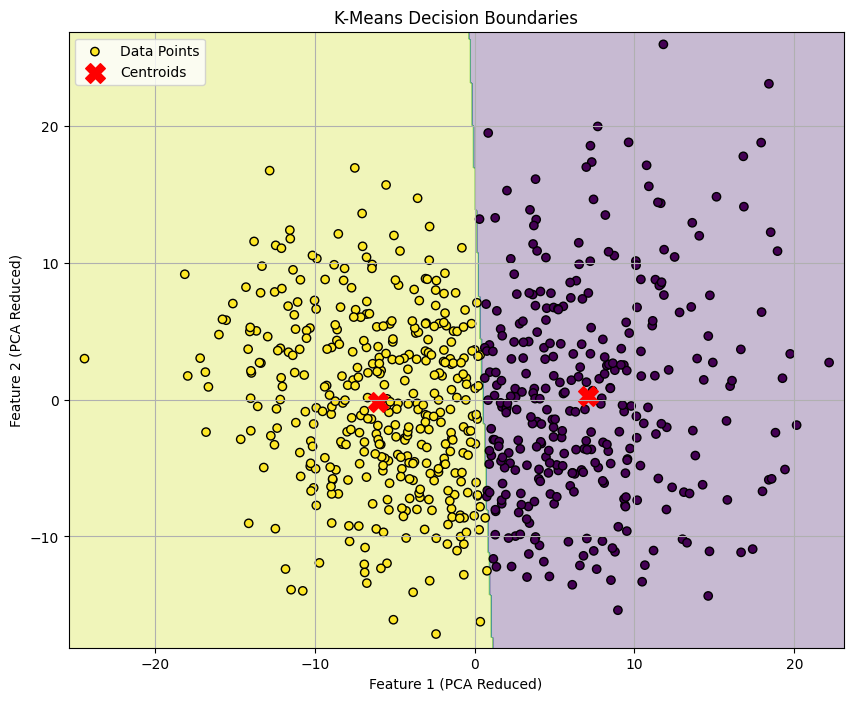

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Assuming X_train is defined and preprocessed

# Step 1: Reduce to 2D if necessary
if X_train.shape[1] > 2:  # Reduce dimensions for visualization if more than 2 features
    pca = PCA(n_components=2, random_state=42)
    X_train_2d = pca.fit_transform(X_train)
else:
    X_train_2d = X_train

# Step 2: Fit K-Means Model on the 2D data
kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans_model.fit_predict(X_train_2d)
centroids_2d = kmeans_model.cluster_centers_

# Step 3: Create a mesh grid for decision boundaries
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Step 4: Predict for each point in the mesh grid
Z = kmeans_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 5: Plot decision boundaries and data points
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')  # Decision boundaries
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k', label="Data Points")
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], s=200, c='red', marker='X', label="Centroids")  # Centroids
plt.title("K-Means Decision Boundaries")
plt.xlabel("Feature 1 (PCA Reduced)" if X_train.shape[1] > 2 else "Feature 1")
plt.ylabel("Feature 2 (PCA Reduced)" if X_train.shape[1] > 2 else "Feature 2")
plt.legend()
plt.grid()
plt.show()



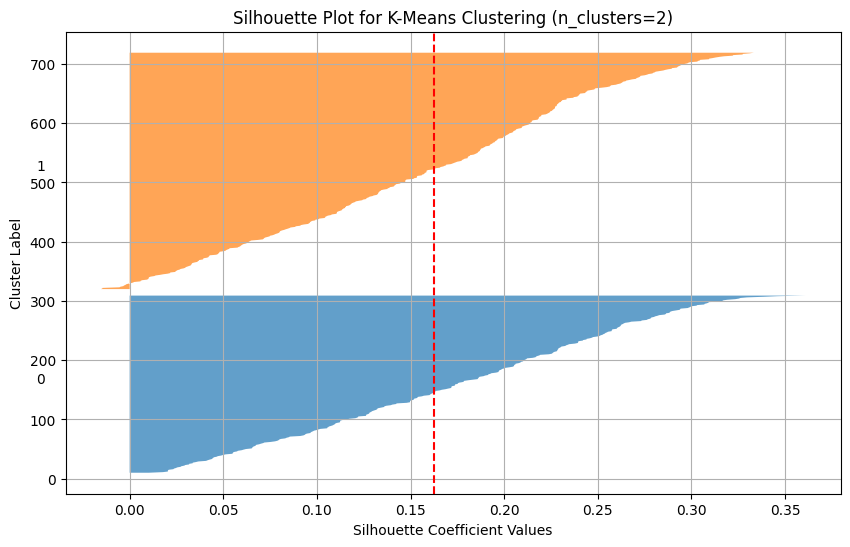

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Assuming X_train is defined and preprocessed

# Step 1: Fit K-Means Model
n_clusters = 2  # Change this to the number of clusters you want
kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans_model.fit_predict(X_train)

# Step 2: Calculate Silhouette Scores
silhouette_avg = silhouette_score(X_train, kmeans_labels)
sample_silhouette_values = silhouette_samples(X_train, kmeans_labels)

# Step 3: Silhouette Plot
plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7
    )
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # Add space between silhouette plots of different clusters

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title(f"Silhouette Plot for K-Means Clustering (n_clusters={n_clusters})")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.grid()
plt.show()


# Stochastic Gradient Descent (SGD) Classifier

In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions
y_pred = sgd_model.predict(X_val)

# Check if model supports predict_proba
y_proba = sgd_model.predict_proba(X_val)[:, 1] if hasattr(sgd_model, "predict_proba") else None

# Calculate metrics
print("\nStochastic Gradient Descent:")
metrics = {
    'Accuracy': accuracy_score(y_val, y_pred),
    'Precision': precision_score(y_val, y_pred),
    'Recall': recall_score(y_val, y_pred),
    'F1-Score': f1_score(y_val, y_pred),
    'ROC-AUC': roc_auc_score(y_val, y_proba) if y_proba is not None else "N/A"
}

# Print metrics
for metric, value in metrics.items():
    if value != "N/A":  # Handle non-numeric metrics
        print(f"{metric}: {value:.4f}")
    else:
        print(f"{metric}: {value}")



Stochastic Gradient Descent:
Accuracy: 0.7933
Precision: 0.7532
Recall: 0.8286
F1-Score: 0.7891
ROC-AUC: N/A


# Gradient Boosting Variants

# CatBoost

In [76]:
# CatBoost
catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)

# Predictions
y_pred_catboost = catboost_model.predict(X_val)
y_proba_catboost = catboost_model.predict_proba(X_val)[:, 1]

# Metrics
accuracy_cb = accuracy_score(y_val, y_pred_catboost)
precision_cb = precision_score(y_val, y_pred_catboost)
recall_cb = recall_score(y_val, y_pred_catboost)
f1_cb = f1_score(y_val, y_pred_catboost)
roc_auc_cb = roc_auc_score(y_val, y_proba_catboost)

print("\nCatBoost Results:")
evaluate_metrics(y_val, y_pred_catboost, y_proba_catboost)



CatBoost Results:
Accuracy: 0.9267
Precision: 0.8986
Recall: 0.9500
F1-Score: 0.9236
ROC-AUC: 0.9819


# LightGBM

In [77]:
# LightGBM
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

# Predictions
y_pred_lgbm = lgbm_model.predict(X_val)
y_proba_lgbm = lgbm_model.predict_proba(X_val)[:, 1]

# Metrics
accuracy_lgbm = accuracy_score(y_val, y_pred_lgbm)
precision_lgbm = precision_score(y_val, y_pred_lgbm)
recall_lgbm = recall_score(y_val, y_pred_lgbm)
f1_lgbm = f1_score(y_val, y_pred_lgbm)
roc_auc_lgbm = roc_auc_score(y_val, y_proba_lgbm)

print("\nLightGBM Results:")
evaluate_metrics(y_val, y_pred_lgbm, y_proba_lgbm)

[LightGBM] [Info] Number of positive: 358, number of negative: 342
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000650 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4674
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511429 -> initscore=0.045722
[LightGBM] [Info] Start training from score 0.045722
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

# XG-BOOST

In [100]:
from xgboost import XGBClassifier

# Step 1: Train XGBoost with Default Parameters
print("\nTraining XGBoost with Default Parameters...")
default_xgb_model = XGBClassifier(tree_method='hist', device='cuda', random_state=42)
default_xgb_model.fit(X_train, y_train)

# Predict and Evaluate
y_pred_default_xgb = default_xgb_model.predict(X_val)
y_proba_default_xgb = default_xgb_model.predict_proba(X_val)[:, 1]
print("\nDefault XGBoost Results:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_default_xgb):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_default_xgb):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_default_xgb):.4f}")
print(f"F1-Score: {f1_score(y_val, y_pred_default_xgb):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_val, y_proba_default_xgb):.4f}")


Training XGBoost with Default Parameters...

Default XGBoost Results:
Accuracy: 0.9133
Precision: 0.8904
Recall: 0.9286
F1-Score: 0.9091
ROC-AUC: 0.9712


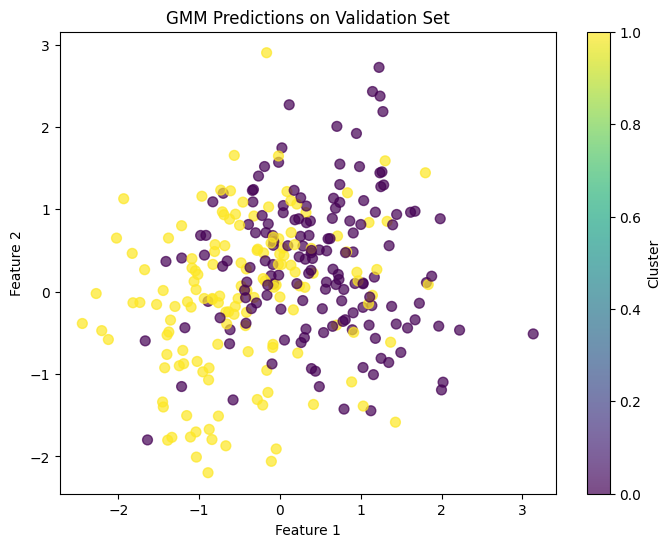

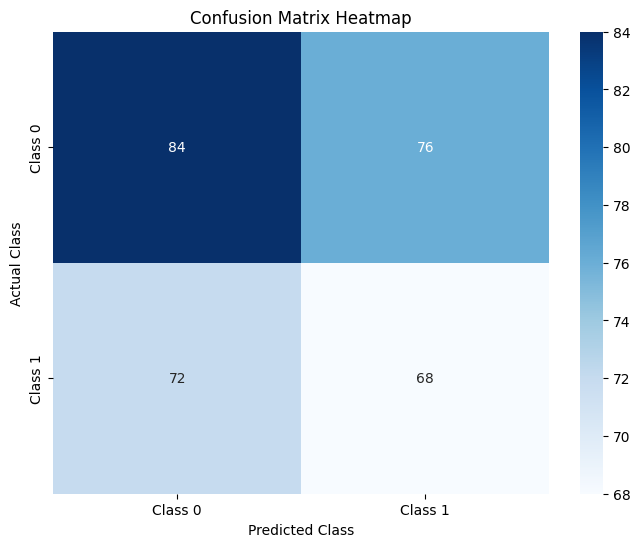

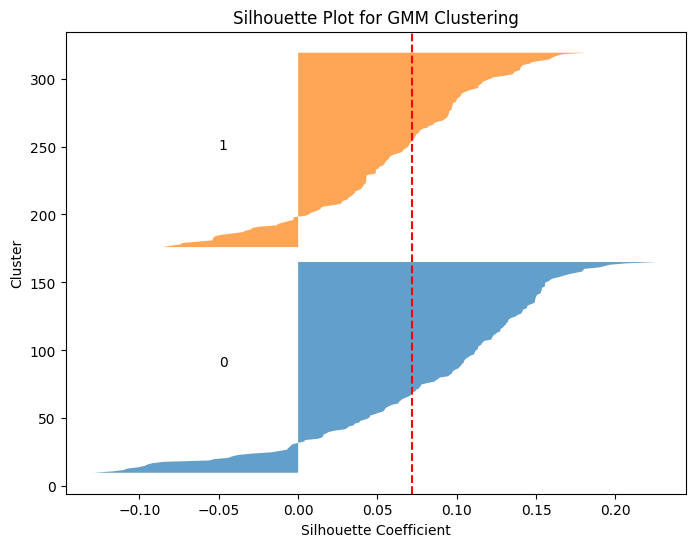

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score

# Scatter plot of GMM predictions
def plot_gmm_clusters(X, y_pred, title="GMM Clustering"):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=50, alpha=0.7)
    plt.colorbar(scatter, label="Cluster")
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Confusion Matrix Heatmap
def plot_confusion_matrix_heatmap(conf_matrix, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix Heatmap")
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.show()

# Silhouette Graph
def plot_silhouette(X, y_pred):
    # Compute the silhouette scores for each sample
    silhouette_vals = silhouette_samples(X, y_pred)
    silhouette_avg = silhouette_score(X, y_pred)
    n_clusters = len(np.unique(y_pred))

    plt.figure(figsize=(8, 6))
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate silhouette scores for samples belonging to cluster i
        ith_cluster_silhouette_vals = silhouette_vals[y_pred == i]
        ith_cluster_silhouette_vals.sort()

        y_upper = y_lower + len(ith_cluster_silhouette_vals)
        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_vals,
            alpha=0.7
        )
        plt.text(-0.05, y_lower + 0.5 * len(ith_cluster_silhouette_vals), str(i))
        y_lower = y_upper + 10  # Space between plots

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.title("Silhouette Plot for GMM Clustering")
    plt.xlabel("Silhouette Coefficient")
    plt.ylabel("Cluster")
    plt.show()

# Plot using the validation set (first two features for simplicity)
X_val_reduced = X_val_scaled[:, :2]  # Use first two features for visualization
plot_gmm_clusters(X_val_reduced, y_pred, title="GMM Predictions on Validation Set")

# Plot the confusion matrix heatmap
class_names = [f"Class {i}" for i in range(n_classes)]
plot_confusion_matrix_heatmap(conf_matrix, class_names)

# Plot the silhouette graph
plot_silhouette(X_val_scaled, y_pred)

# Comparison in accuracy

In [101]:
import pandas as pd

# Store all results in a list of dictionaries
results = [
    {"Model": "Default Random Forest", "Accuracy": 0.8940},
    {"Model": "Neural Network", "Accuracy": 0.9400},
    {"Model": "Cross-Validation", "Accuracy": 0.9510},
    {"Model": "Neural Network (Adjusted Architecture)", "Accuracy": 0.9567},
    {"Model": "Deeper Neural Network", "Accuracy": 0.9500},
    {"Model": "Neural Network with Dropout and Regularization", "Accuracy": 0.9567},
    {"Model": "Decision Tree", "Accuracy": 0.7800},
    {"Model": "MLPClassifier", "Accuracy": 0.9533},
    {"Model": "XGBoost", "Accuracy": 0.9133},
    {"Model": "LightGBM", "Accuracy": 0.9100},
    {"Model": "CatBoost", "Accuracy": 0.9267},
    {"Model": "Stochastic Gradient Descent", "Accuracy": 0.7933},
    {"Model": "k-Nearest Neighbors (Before Cross-Validation)", "Accuracy": 0.9033},
    {"Model": "k-Nearest Neighbors (Cross-Validation)", "Accuracy": 0.9270},
    {"Model": "Bernoulli Naïve Bayes", "Accuracy": 0.7300},
    {"Model": "Naïve Bayes (Validation Data)", "Accuracy": 0.8033},
    {"Model": "Naïve Bayes (Cross-Validation)", "Accuracy": 0.7930},
    {"Model": "Naïve Bayes (Training Data)", "Accuracy": 0.7871},
    {"Model": "Perceptron", "Accuracy": 0.8067},
    {"Model": "Random Forest (Cross-Validation)", "Accuracy": 0.8898}
]

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Find and print the best model
best_model = results_df.loc[results_df["Accuracy"].idxmax()]
print(f"Best Model: {best_model['Model']}\nAccuracy: {best_model['Accuracy']:.4f}")



Best Model: Neural Network (Adjusted Architecture)
Accuracy: 0.9567
